In this tutorial, we show how to
1. Collect data from website
2. Transform JSON format to Pandas Dataframe
3. Data Transformation
4. Visualization

## Collect data

In [1]:
from requests import get
url = 'https://www.api.bnk48.com/api/members?limit=100'
get_url = get(url)
member = get_url.json()['members']

Print Example of json element

In [2]:
member[0]

{'avatar_image': 'https://bnk48-www-html.s3-ap-southeast-1.amazonaws.com/uploads/members/file-08ccbfae706a2ebd07e39d352b2947cb.jpg',
 'bio': {'dislike_foods': {'en': 'ถั่วในเค้ก', 'th': 'ถั่วในเค้ก'},
  'dislike_school_subjects': {},
  'dislikes': {},
  'favourite_foods': {'en': 'เต้าหู้ไข่/ เค้ก', 'th': 'เต้าหู้ไข่/ เค้ก'},
  'favourite_games': {'en': 'JRPG/ MOBA', 'th': 'JRPG/ MOBA'},
  'favourite_school_subjects': {},
  'food_allergies': {},
  'hobbies': {'en': 'กิน นอน เล่นเกม ฟังเพลง Cosplay',
   'th': 'กิน, นอน, เล่นเกม, ฟังเพลง, Cosplay'},
  'likes': {'th': '-'}},
 'birth_date': 830995200000,
 'blood_group': 2,
 'changed': 1511939830431,
 'created': 1504149696733,
 'first_name': {'en': 'Cherprang', 'th': 'เฌอปราง'},
 'height': 160,
 'id': 2,
 'instagram': 'cherprang.bnk48official',
 'last_name': {'en': 'Areekul', 'th': 'อารีย์กุล'},
 'nickname': {'en': 'Cherprang', 'th': 'เฌอปราง'},
 'position': 99,
 'profile_image': 'https://bnk48-www-html.s3-ap-southeast-1.amazonaws.com/upload

## Transform to Pandas Dataframe

We transform json element to DataFrame via Pandas Library 

In [3]:
import pandas as pd
from pandas.io.json import json_normalize
bnk48 = pd.DataFrame.from_dict(json_normalize(member), orient='columns')
print(list(bnk48))

['avatar_image', 'bio.dislike_foods.en', 'bio.dislike_foods.th', 'bio.dislike_school_subjects.en', 'bio.dislike_school_subjects.th', 'bio.dislikes.en', 'bio.dislikes.th', 'bio.favourite_foods.en', 'bio.favourite_foods.th', 'bio.favourite_games.en', 'bio.favourite_games.th', 'bio.favourite_school_subjects.en', 'bio.favourite_school_subjects.th', 'bio.food_allergies.en', 'bio.food_allergies.th', 'bio.hobbies.en', 'bio.hobbies.th', 'bio.likes.en', 'bio.likes.th', 'birth_date', 'blood_group', 'changed', 'created', 'first_name.en', 'first_name.th', 'height', 'id', 'instagram', 'last_name.en', 'last_name.th', 'nickname.en', 'nickname.th', 'position', 'profile_image', 'profile_image_2x', 'province', 'slug', 'status', 'team']


## Data Cleansing and Transformation

Change some column name

In [4]:
bnk48_transform = bnk48.rename(columns = {'first_name.en':'First_Name_Eng','first_name.th':'First_Name_Thai','last_name.en':'Last_Name_Eng'\
                          ,'last_name.th':'Last_Name_Thai','nickname.en':'Nickname_Eng','nickname.th':'Nickname_Thai','province':'Birth_Place'})

In [5]:
bnk48_transform = bnk48_transform.loc[:, ~bnk48_transform.columns.str.contains('.en')]
bnk48_transform.head(2)

,avatar_image,bio.dislike_foods.th,bio.dislike_school_subjects.th,bio.dislikes.th,bio.favourite_foods.th,bio.favourite_games.th,bio.favourite_school_subjects.th,bio.food_allergies.th,bio.hobbies.th,bio.likes.th,...,Last_Name_Thai,Nickname_Eng,Nickname_Thai,position,profile_image,profile_image_2x,Birth_Place,slug,status,team
0,https://bnk48-www-html.s3-ap-southeast-1.amazo...,ถั่วในเค้ก,NaN,NaN,เต้าหู้ไข่/ เค้ก,JRPG/ MOBA,NaN,NaN,"กิน, นอน, เล่นเกม, ฟังเพลง, Cosplay",-,...,อารีย์กุล,Cherprang,เฌอปราง,99.0,https://bnk48-www-html.s3-ap-southeast-1.amazo...,https://bnk48-www-html.s3-ap-southeast-1.amazo...,Bangkok,cherprang,1,2.0
1,https://bnk48-www-html.s3-ap-southeast-1.amazo...,NaN,แคลคูลัส,งู สัตว์เลื้อยคลาน ของมีกลิ่น ผี,ปลา กุ้ง ไข่ ปู,"card game, board-game, FPS (OW, CSGO)",จิตวิทยา,NaN,"ฟังเพลง, ดูหนัง, เที่ยวนอกบ้าน","SW(CloneTrooper), CD",...,ศรีเนียน,Can,แคนแคน,NaN,https://bnk48-www-html.s3-ap-southeast-1.amazo...,https://bnk48-www-html.s3-ap-southeast-1.amazo...,Bangkok,can,1,1.0


Change column index

In [6]:
mycolumns = ['Nickname_Thai','First_Name_Thai','Last_Name_Thai',\
             'Nickname_Eng','First_Name_Eng','Last_Name_Eng']
bnk48_transform = bnk48_transform.reindex(columns=(mycolumns + list([a for a in bnk48_transform.columns if a not in mycolumns]) ))

In [7]:
bnk48_transform.head(5)

,Nickname_Thai,First_Name_Thai,Last_Name_Thai,Nickname_Eng,First_Name_Eng,Last_Name_Eng,avatar_image,bio.dislike_foods.th,bio.dislike_school_subjects.th,bio.dislikes.th,...,height,id,instagram,position,profile_image,profile_image_2x,Birth_Place,slug,status,team
0,เฌอปราง,เฌอปราง,อารีย์กุล,Cherprang,Cherprang,Areekul,https://bnk48-www-html.s3-ap-southeast-1.amazo...,ถั่วในเค้ก,NaN,NaN,...,160,2,cherprang.bnk48official,99.0,https://bnk48-www-html.s3-ap-southeast-1.amazo...,https://bnk48-www-html.s3-ap-southeast-1.amazo...,Bangkok,cherprang,1,2.0
1,แคนแคน,นายิกา,ศรีเนียน,Can,Nayika,Srinian,https://bnk48-www-html.s3-ap-southeast-1.amazo...,NaN,แคลคูลัส,งู สัตว์เลื้อยคลาน ของมีกลิ่น ผี,...,160,1,can.bnk48official,NaN,https://bnk48-www-html.s3-ap-southeast-1.amazo...,https://bnk48-www-html.s3-ap-southeast-1.amazo...,Bangkok,can,1,1.0
2,อิซูรินะ,รินะ,อิซึตะ,Izurina,Rina,Izuta,https://bnk48-www-html.s3-ap-southeast-1.amazo...,NaN,NaN,NaN,...,158,4,rinaizuta.bnk48official,NaN,https://bnk48-www-html.s3-ap-southeast-1.amazo...,https://bnk48-www-html.s3-ap-southeast-1.amazo...,"Saitama, Japan",izurina,1,NaN
3,จ๋า,ณปภัช,วรพฤทธานนท์,Jaa,Napaphat,Worraphuttanon,https://bnk48-www-html.s3-ap-southeast-1.amazo...,NaN,NaN,NaN,...,160,5,jaa.bnk48official,NaN,https://bnk48-www-html.s3-ap-southeast-1.amazo...,https://bnk48-www-html.s3-ap-southeast-1.amazo...,Bangkok,jaa,1,NaN
4,แจน,เจตสุภา,เครือแตง,Jan,Jetsupa,Kruetang,https://bnk48-www-html.s3-ap-southeast-1.amazo...,ผัก,เลข,หนอน แมลง ผี จิ้งจก ตุ๊กแก,...,162,6,jan.bnk48official,NaN,https://bnk48-www-html.s3-ap-southeast-1.amazo...,https://bnk48-www-html.s3-ap-southeast-1.amazo...,Sing Buri,jan,1,NaN


Delete some columns

In [8]:
bnk48_transform = bnk48_transform.drop(['avatar_image','profile_image','profile_image_2x','changed','created',\
                                        'slug','team','position','status','team','id'],axis = 1)

In Birthday column. We mus transform Epoch Unix Time to Date by function fromtimestamp but before we transform we must devide by 1000

In [9]:
import datetime
bnk48_transform['birth_date'] = bnk48_transform['birth_date'].apply(lambda time: datetime.datetime.fromtimestamp(time/1000.0).strftime('%m-%d-%Y'))

In [10]:
bnk48_transform.dtypes

Nickname_Thai                       object
First_Name_Thai                     object
Last_Name_Thai                      object
Nickname_Eng                        object
First_Name_Eng                      object
Last_Name_Eng                       object
bio.dislike_foods.th                object
bio.dislike_school_subjects.th      object
bio.dislikes.th                     object
bio.favourite_foods.th              object
bio.favourite_games.th              object
bio.favourite_school_subjects.th    object
bio.food_allergies.th               object
bio.hobbies.th                      object
bio.likes.th                        object
birth_date                          object
blood_group                          int64
height                               int64
instagram                           object
Birth_Place                         object
dtype: object

Convert blood group from number to A,B,AB,O

In [11]:
def convertblood(blood_groups):
    if blood_groups == 1:
        group = "A"
    elif blood_groups == 2:
        group = "B"
    elif blood_groups == 3:
        group = "AB"
    else:
        group = "O"
    
    return group

In [12]:
bnk48_transform['blood_group'] = bnk48_transform['blood_group'].apply(convertblood)

แก้สถานที่เกิดเฌอปรางจากกรุงเทพเป็น อ.หาดใหญ่ จ.สงขลา(เฌอปรางเคยเล่าไว้ใน voov)

In [13]:
bnk48_transform.at[0, 'Birth_Place'] = "Songkhla"
bnk48_transform.head(2)

,Nickname_Thai,First_Name_Thai,Last_Name_Thai,Nickname_Eng,First_Name_Eng,Last_Name_Eng,bio.dislike_foods.th,bio.dislike_school_subjects.th,bio.dislikes.th,bio.favourite_foods.th,bio.favourite_games.th,bio.favourite_school_subjects.th,bio.food_allergies.th,bio.hobbies.th,bio.likes.th,birth_date,blood_group,height,instagram,Birth_Place
0,เฌอปราง,เฌอปราง,อารีย์กุล,Cherprang,Cherprang,Areekul,ถั่วในเค้ก,NaN,NaN,เต้าหู้ไข่/ เค้ก,JRPG/ MOBA,NaN,NaN,"กิน, นอน, เล่นเกม, ฟังเพลง, Cosplay",-,05-02-1996,B,160,cherprang.bnk48official,Songkhla
1,แคนแคน,นายิกา,ศรีเนียน,Can,Nayika,Srinian,NaN,แคลคูลัส,งู สัตว์เลื้อยคลาน ของมีกลิ่น ผี,ปลา กุ้ง ไข่ ปู,"card game, board-game, FPS (OW, CSGO)",จิตวิทยา,NaN,"ฟังเพลง, ดูหนัง, เที่ยวนอกบ้าน","SW(CloneTrooper), CD",11-10-1997,B,160,can.bnk48official,Bangkok


## Visualization

Plot some column
1. Blood type
2. Distribution of Hight
3. Distribution of Age

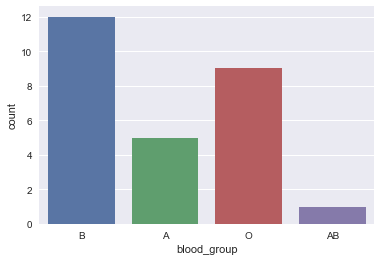

In [14]:
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="blood_group", data=bnk48_transform)

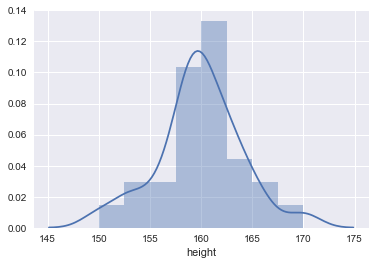

In [15]:
sns.distplot(bnk48_transform["height"])

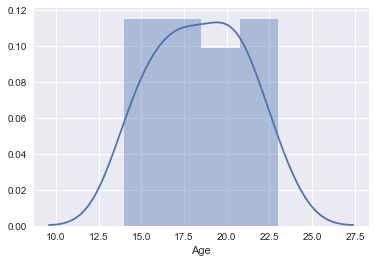

In [16]:
from math import floor
myday = pd.to_datetime('02-26-2018')
bnk48_transform["Age"] = bnk48_transform["birth_date"].apply(lambda x: floor(len(pd.date_range(start = x,end = myday, freq = "D"))/365))
sns.distplot(bnk48_transform["Age"])